# Dataset


In [1]:
# Load Dataset
import pandas as pd
data = pd.read_csv("E:\DataSetForMachine\Corona_Virus_Tweets/Corona_NLP_train.csv", encoding='latin-1')

In [2]:
#Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [5]:
data.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

# Cleaning tweet

In [6]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [7]:
review_data = data[['OriginalTweet','Sentiment']]
print(review_data.shape)
review_data.head(5)

(41157, 2)


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
# calculating length of each record in our df
review_data['length'] = review_data['OriginalTweet'].apply(lambda x: len(x))
review_data.head()

,OriginalTweet,Sentiment,length
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,advice Talk to your neighbours family to excha...,Positive,237
2,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,My food stock is not the only one which is emp...,Positive,306
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310


In [9]:
# Load Text Cleaning Package
import neattext.functions as nfx

review_data['OriginalTweet'].apply(nfx.extract_hashtags)

0                                                       []
1                                                       []
2                                                       []
3        [#COVID19france, #COVID_19, #COVID19, #coronav...
4        [#COVID19, #coronavirus, #CoronavirusFrance, #...
                               ...                        
41152                                     [#NZ, #COVID-19]
41153                                                   []
41154                         [#coronavirus, #toiletpaper]
41155               [#coronavirus, #COVID19, #coronavirus]
41156                                                   []
Name: OriginalTweet, Length: 41157, dtype: object

In [10]:
#Remove hashtag
review_data['clean_tweet'] = review_data['OriginalTweet'].apply(nfx.remove_hashtags)
review_data[['OriginalTweet','clean_tweet']]

,OriginalTweet,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the ou..."
...,...,...
41152,Airline pilots offering to stock supermarket s...,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...,You know itÂs getting tough when @KameronWild...
41155,Is it wrong that the smell of hand sanitizer i...,Is it wrong that the smell of hand sanitizer i...


In [11]:
#Remove mention
review_data['clean_tweet'] = review_data['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))
review_data[['OriginalTweet','clean_tweet']]

,OriginalTweet,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,https://t.co/iFz9FAn2Pa and https://t.co...
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the ou..."
...,...,...
41152,Airline pilots offering to stock supermarket s...,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...,You know itÂs getting tough when is ration...
41155,Is it wrong that the smell of hand sanitizer i...,Is it wrong that the smell of hand sanitizer i...


In [12]:
review_data['clean_tweet'].iloc[5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods,   reports https://t.co/cfXch7a2lU'

In [13]:
#Remove urls
review_data['clean_tweet'] = review_data['clean_tweet'].apply(nfx.remove_urls)

In [14]:
review_data['clean_tweet'].iloc[5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods,   reports '

In [15]:
#Remove Punctuations
review_data['clean_tweet'] = review_data['clean_tweet'].apply(nfx.remove_puncts)
review_data[['OriginalTweet','clean_tweet']]

,OriginalTweet,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,and and
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Me ready to go at supermarket during the out...
...,...,...
41152,Airline pilots offering to stock supermarket s...,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...,You know itÂs getting tough when is ration...
41155,Is it wrong that the smell of hand sanitizer i...,Is it wrong that the smell of hand sanitizer i...


In [16]:
#Remove Stopwords 
import nltk
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#data['clean_tweet'] =data['clean_tweet'].apply(nfx.remove_stopwords).tolist()
review_data['clean_tweet'] = review_data['clean_tweet'].apply(lambda x: remove_stopwords(x))

In [18]:
#Remove numbers and english punctuation
!pip install translate
import translate
import re
import string
english_pun = string.punctuation
puncts='-‐‒–‑―⸗⸚⸺⹀〜〰゠︱︲﹘﹣֊« »‘ ’‛“ ”‟‹ ›[ ]⁽ ⁾⌈ ⌉⌊ ⌋!"#%&:;\¡؟؛،﹪?@ ...'
list_pun = puncts + english_pun
def preprocessing (data):
    translator = str.maketrans(list_pun,' '*len(list_pun))
    modified_data = data.translate(translator)
    modified_data=re.sub('[0-9]+',' ',modified_data)
    return modified_data

In [19]:
review_data['clean_tweet'] = [preprocessing(i) for i in review_data['clean_tweet']]

In [20]:
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [21]:
review_data['clean_tweet'] = review_data['clean_tweet'].apply(lambda x: remove_extra_white_spaces(x))

In [22]:
def convert_to_lower(text):
    return text.lower()
review_data['clean_tweet']= review_data['clean_tweet'].apply(lambda x: convert_to_lower(x))

In [23]:
review_data[['OriginalTweet','clean_tweet']]

,OriginalTweet,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,
1,advice Talk to your neighbours family to excha...,advice talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths to give elde...,coronavirus australia woolworths give elderl...
3,My food stock is not the only one which is emp...,my food stock one empty please dont panic ther...
4,"Me, ready to go at supermarket during the #COV...",me ready go supermarket outbreak not im parano...
...,...,...
41152,Airline pilots offering to stock supermarket s...,airline pilots offering stock supermarket shel...
41153,Response to complaint not provided citing COVI...,response complaint provided citing covid rela...
41154,You know itÂs getting tough when @KameronWild...,you know itâs getting tough rationing toilet ...
41155,Is it wrong that the smell of hand sanitizer i...,is wrong smell hand sanitizer starting turn


In [24]:
# calculating length of each record after performing text cleaning
review_data['length_after_cleaning'] = review_data['clean_tweet'].apply(lambda x: len(x))
review_data.head()

,OriginalTweet,Sentiment,length,clean_tweet,length_after_cleaning
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,,0
1,advice Talk to your neighbours family to excha...,Positive,237,advice talk neighbours family exchange phone n...,196
2,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronavirus australia woolworths give elderl...,102
3,My food stock is not the only one which is emp...,Positive,306,my food stock one empty please dont panic ther...,110
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,me ready go supermarket outbreak not im parano...,130


In [27]:
#We don’t really need neutral, Extremely Positive or Extremely Negative reviews in our dataset
#So, drop those rows from the dataset.
#We do binary classification 'positive or negative'

review_data = review_data[review_data['Sentiment'] != 'Neutral']
review_data = review_data[review_data['Sentiment'] != 'Extremely Positive']
review_data = review_data[review_data['Sentiment'] != 'Extremely Negative']

print(review_data.shape)
review_data.head(5)

(21339, 5)


,OriginalTweet,Sentiment,length,clean_tweet,length_after_cleaning
1,advice Talk to your neighbours family to excha...,Positive,237,advice talk neighbours family exchange phone n...,196
2,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronavirus australia woolworths give elderl...,102
3,My food stock is not the only one which is emp...,Positive,306,my food stock one empty please dont panic ther...,110
5,As news of the regionÂs first confirmed COVID...,Positive,250,as news regionâs first confirmed covid case ...,177
6,Cashier at grocery store was sharing his insig...,Positive,180,cashier grocery store sharing insights to prov...,101


In [28]:
review_data.isnull().sum()

OriginalTweet            0
Sentiment                0
length                   0
clean_tweet              0
length_after_cleaning    0
dtype: int64

In [29]:
review_data["Sentiment"].value_counts()

Positive    11422
Negative     9917
Name: Sentiment, dtype: int64

# Sentiment Analysis

In [30]:
#The labels for this dataset are categorical. Machines understand only numeric data.
#So, convert the categorical values to numeric using the factorize() method.
#This returns an array of numeric values and an Index of categories.
sentiment_label = review_data.Sentiment.factorize()
sentiment_label
#0 --> positive and 1 --> negative

(array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 Index(['Positive', 'Negative'], dtype='object'))

In [31]:
#first ,retrieve all the text data from the dataset
tweet = review_data.clean_tweet.values

In [32]:
#Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
#creates an association between the words and the assigned numbers.
#This association is stored in the form of a dictionary in the tokenizer.word_index attribute.
tokenizer.fit_on_texts(tweet)

In [33]:
#replace the words with their assigned numbers
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [34]:
#Each of the sentences in the dataset is not of equal length. Use padding to pad the sentences to have equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

# Text Classifier

In [35]:
#connect layers sequentially
from tensorflow.keras.models import Sequential

#types of layers
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
vocab_size = 100000
#model --> empty
model = Sequential()
#Add layers to model

#computing an embedding matrix, the meaning of every word and its calculations(which are called hidden states) are stored
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))

#LSTM stands for Long Short Term Memory Networks. 
#It is a variant of Recurrent Neural Networks. 
#Recurrent Neural Networks are usually used with sequential data such as text
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))

# To avoid overfitting
model.add(Dropout(0.2))

#Dense --> fully connected
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           3200000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 3,216,651
Trainable params: 3,216,651
Non-trainable params: 0
______________________________________________

In [36]:
#Train the sentiment analysis model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
534/534 [==============================] - 400s 719ms/step - loss: 0.6355 - accuracy: 0.6274 - val_loss: 0.5513 - val_accuracy: 0.7282
Epoch 2/5
534/534 [==============================] - 332s 621ms/step - loss: 0.4934 - accuracy: 0.7684 - val_loss: 0.4825 - val_accuracy: 0.7786
Epoch 3/5
534/534 [==============================] - 342s 640ms/step - loss: 0.4213 - accuracy: 0.8152 - val_loss: 0.4705 - val_accuracy: 0.7861
Epoch 4/5
534/534 [==============================] - 355s 665ms/step - loss: 0.3796 - accuracy: 0.8396 - val_loss: 0.4773 - val_accuracy: 0.7915
Epoch 5/5
534/534 [==============================] - 394s 737ms/step - loss: 0.3522 - accuracy: 0.8507 - val_loss: 0.4778 - val_accuracy: 0.7943


In [39]:
history.history['accuracy'] #train

[0.6273797750473022,
 0.7684376835823059,
 0.8151836395263672,
 0.8395524621009827,
 0.8506824374198914]

In [40]:
history.history['val_accuracy'] #test

[0.728209912776947,
 0.7785848379135132,
 0.7860824465751648,
 0.7914714217185974,
 0.7942830324172974]

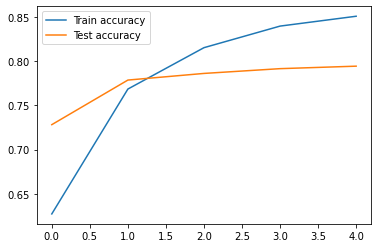

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

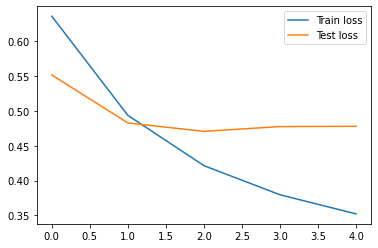

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

In [41]:
#Define a function that takes a text as input and outputs its prediction label.
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])
test_sentence1 = "I have corona."
predict_sentiment(test_sentence1)
test_sentence2 = "All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket."
predict_sentiment(test_sentence2)
test_sentence3 = "I've tested positive for COVID-19 today with mild symptoms. Post the confirmation, I have quarantined myself at home and taking all the necessary precautions and medication required."
predict_sentiment(test_sentence3)
test_sentence4 = "Global demand is plummeting because of the Covid-19 pandemic, and reduced supply will still not bring oil prices up to last year's levels. India should move to fill up its strategic petroleum reserves while prices are low"
predict_sentiment(test_sentence4)

1/1 [==============================] - 3s 3s/step
Predicted label:  Positive
1/1 [==============================] - 2s 2s/step
Predicted label:  Positive
1/1 [==============================] - 2s 2s/step
Predicted label:  Positive
1/1 [==============================] - 2s 2s/step
Predicted label:  Negative


In [44]:
test_sentence5 = input('Enter your review : ')
predict_sentiment(test_sentence5)

Enter your review : I hate corona
1/1 [==============================] - 2s 2s/step
Predicted label:  Negative


# End